$$ \text{Logistic Regression:} $$

$$ f_{\vec{w}, b}(\vec{x}) = \frac{1}{1 + e^{-(\vec{w}\cdot\vec{x} + b)}} $$


$$ \text{Sigmoid Function:} $$

$$ g(z) = \frac{1}{1 + e^{-z}} $$


$$ \text{Decision Boundary (outcomes have equal probability):} $$

$$ z = \vec{w}\cdot\vec{x} + b = 0 $$


$$ \text{Cost Function:} $$

$$ J(\vec{w}, b) = \frac{1}{m} \Sigma_{i=1}^{m} L^{(i)}


$$ \text{Loss Function:} $$

$$ L = L \left( f_{\vec{w}, b}(\vec{x}^{(i)}), y^{(i)} \right) $$


$$ \text{Square Error Loss Function:} $$

$$ L = \frac{1}{2} \left( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \right) ^2$$


$$ \text{Logistic Loss Function:} $$

$$ L = f(a,b) = 
     \begin{cases}
       -\log{ \left( f_{\vec{w}, b}(\vec{x}^{(i)}) \right) } &\quad\text{if y}^{(i)}=1\\
       -\log{ \left( 1 - f_{\vec{w}, b}(\vec{x}^{(i)}) \right)} &\quad\text{if y}^{(i)}=0\\
     \end{cases}
$$


$$ \text{Logistic Loss Function (simplified form):} $$

$$ L = f(a,b) = -y \log{ \left( f_{\vec{w}, b}(\vec{x}^{(i)}) \right) }- (1 - y^{(i)}) \log{ \left( 1 - f_{\vec{w}, b}(\vec{x}^{(i)}) \right)} $$


$$ \text{Logistic Regression Cost Function:} $$

$$ J(\vec{w}, b) = \frac{-1}{m} \Sigma_{i=1}^{m} \left[ y \log{ \left( f_{\vec{w}, b}(\vec{x}^{(i)}) \right) } + (1 - y^{(i)}) \log{ \left( 1 - f_{\vec{w}, b}(\vec{x}^{(i)}) \right)} \right]


_**Logistic Regression**_\
&rarr; Prediction from linear regression, z, is inserted into the sigmoid function/logistic function, g(z).\
&rarr; This will return a value between 0 and 1, which can be seen as probability.\
&rarr; Therefore 0 represents a benign tumour, 1 represents a malignant tumour.\
&rarr; Model outputs the probability that the class is 1.\
&rarr; If model outputs f(x) = 0.7, the model gives the case a 70% chance of being malignant.

_**Decision Boundary:**_\
&rarr; In binary classification the prediction must be 0 (i.e. benign) or 1 (i.e. malignant).\
&rarr; But the model output is a probability, between 0 and 1, not a binary output.\
&rarr; We use a 'decision boundary' to classify/predict if the case as 0 or 1.\
&rarr; This boundary occurs where z=0, as g(z=0) = 0.5.\
&rarr; This doesnt need to be linear regression, it could be polynomial prediction function.

_**Cost Function:**_\
&rarr; Measure how well params fit our training data.\
&rarr; It quantifies difference between predicted and true values.\
&rarr; Used in gradient descent to find best parameters for model.

_**Cost Function (linear regression):**_\
&rarr; For linear regression, the cost function is a convex/bowl shaped function.\
&rarr; For linear regression, we use square error cost function.

_**Cost Function (logistic regression):**_\
&rarr; For logistic regression, the cost function is non convex - many local minima!\
&rarr; For logistic regression, square error cost function is not a good choice.\
&rarr; We use the logistic loss function, show above.\
&rarr; When ypred=1 and ytrue=1, the error is 0, we need a cost function that follows.\
&rarr; When ypred=0.15 and ytrue=1, the error is large, we need a cost function that follows.\
&rarr; Given our logistic loss function, the overall cost function is convex.\
&rarr; Now gradient descent to global minimum is possible.\

_**Logistic Regression (pred vs true):**_\
&rarr; ypred_i = 1, ytrue_i = 1, loss = 0\
&rarr; ypred_i = 1, ytrue_i = 0, loss => inifinity\
&rarr; ypred_i = 0, ytrue_i = 0, loss =0 \
&rarr; ypred_i = 0, ytrue_i = 1, loss => inifinity

_**Gradient Descent:**_\
&rarr; same process, repeat the simultanious updates, until cost is minimised.\
&rarr; when cost is minimised, we have optimal w and b values for our model.\
&rarr; also use vectorisation here to make gradient descent run faster.


In [113]:
import copy
import math

import matplotlib.pyplot as plt
import numpy as np
from lab_utils_common import draw_vthresh, plot_data

%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import (
    compute_cost_logistic,
    dlc,
    plot_data,
    plt_tumor_data,
    sigmoid,
)
from plt_quad_logistic import plt_prob, plt_quad_logistic

plt.style.use('./deeplearning.mplstyle')

In [92]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [93]:
print("sigmoid function, S(z)\n")
z_vals = np.arange(-10,25,5)
for val in z_vals:
    print(f"S({val})\t->\t{sigmoid(val):.4f}")

sigmoid function, S(z)

S(-10)	->	0.0000
S(-5)	->	0.0067
S(0)	->	0.5000
S(5)	->	0.9933
S(10)	->	1.0000
S(15)	->	1.0000
S(20)	->	1.0000


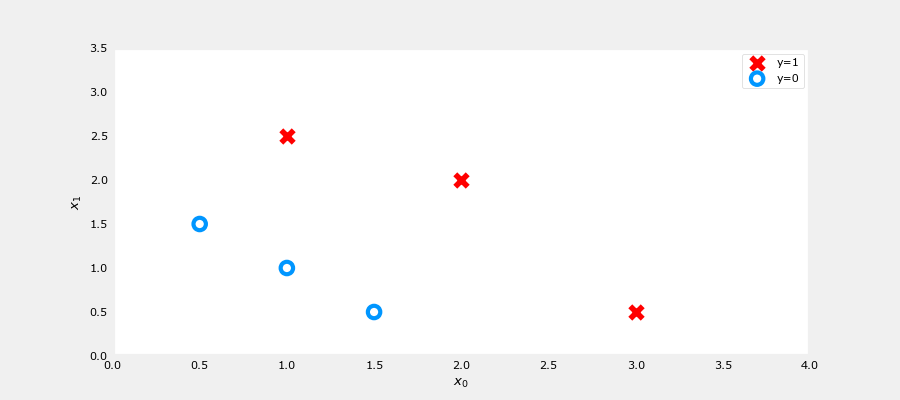

In [94]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

fig,ax = plt.subplots(1, 1, figsize=(9,4))
plot_data(X, y, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

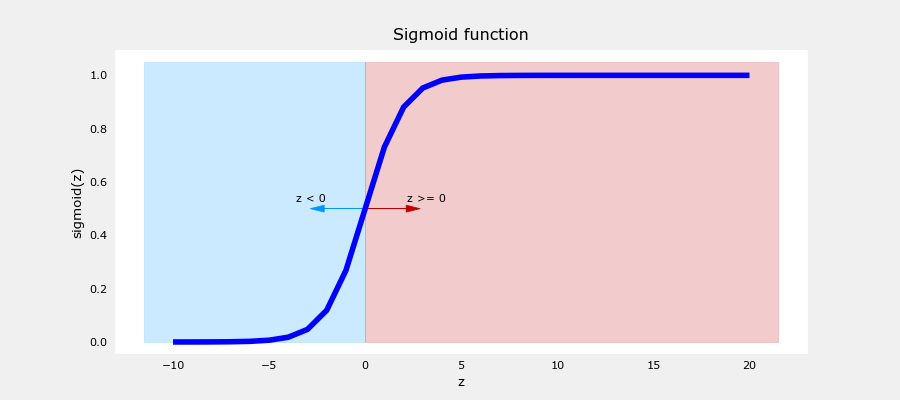

In [95]:
z = np.arange(-10,21)

fig,ax = plt.subplots(1, 1, figsize=(9,4))
ax.plot(z, sigmoid(z), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax, 0)

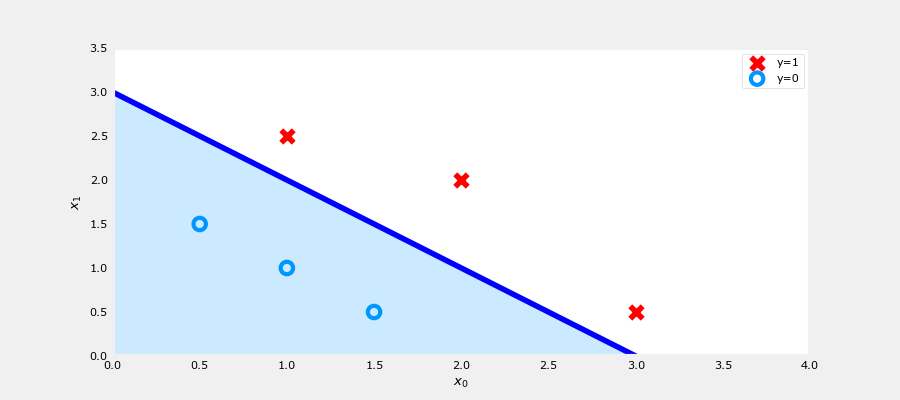

In [96]:
# two feature linear regression:
# z = (w_0 * x_0) + (w_1 * x_1) + b.
# decision boundary occurs when z = 0.
# set z to zero -> z = x_0 + x_1 - 3 = 0.
# decision boundary -> x1 = 3 - x0

x0 = np.arange(0,6)
x1 = 3 - x0
fig, ax = plt.subplots(1, 1, figsize=(9,4))

ax.plot(x0, x1, c="b")
ax.axis([0, 4, 0, 3.5])
ax.fill_between(x0, x1, alpha=0.2)

plot_data(X, y, ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

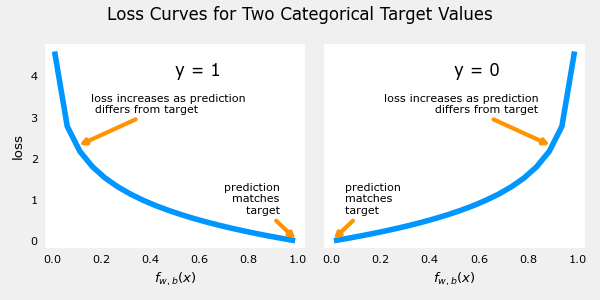

In [105]:
from plt_logistic_loss import plt_two_logistic_loss_curves

plt_two_logistic_loss_curves()

In [98]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost = cost / m
    return cost

In [111]:
w_array = np.array([1,1])
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

print("Cost for b=-3:", compute_cost_logistic(X_train, y_train, w_array, b=-3))
print("Cost for b=-4:", compute_cost_logistic(X_train, y_train, w_array, b=-4))

Cost for b=-3: 0.36686678640551745
Cost for b=-4: 0.5036808636748461


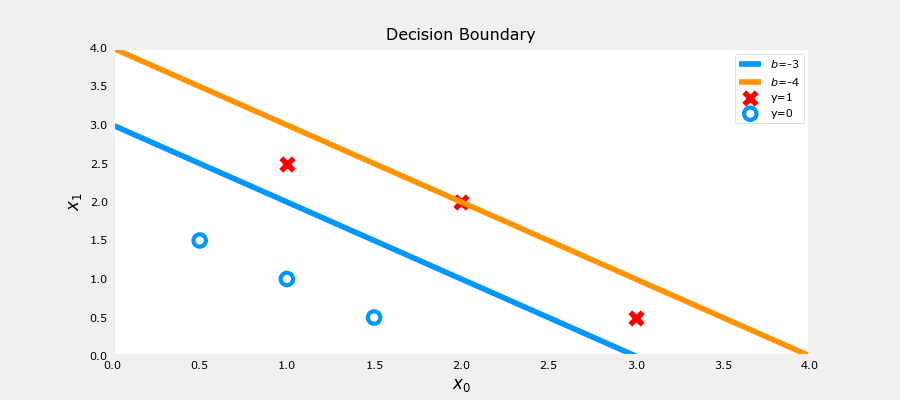

In [110]:
x0 = np.arange(0,6)
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(9,4))
ax.plot(x0,x1, label="$b$=-3")
ax.plot(x0,x1_other, label="$b$=-4")
ax.axis([0, 4, 0, 4])

plot_data(X_train,y_train,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [114]:
def compute_gradient_logistic(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_db, dj_dw

In [116]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i<100000:
            J_history.append( compute_cost_logistic(X, y, w, b) )
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    return w, b, J_history


In [118]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870456   
Iteration 2000: Cost 0.08460064176930081   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.042907594216820076   
Iteration 5000: Cost 0.034338477298845684   
Iteration 6000: Cost 0.028603798022120097   
Iteration 7000: Cost 0.024501569608793   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.3 5.1], b:-14.222409982019837


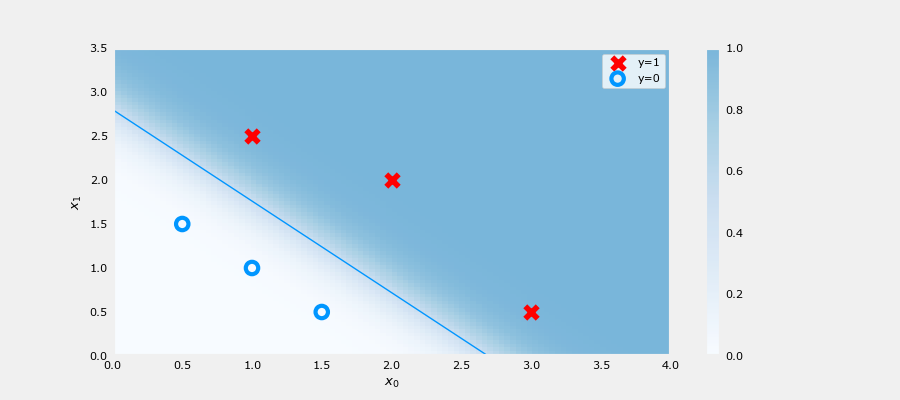

In [121]:
fig,ax = plt.subplots(1,1,figsize=(9,4))
# plot the probability
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c=dlc["dlblue"], lw=1)
plt.show()

$$ \text{Logistic Regression w/ Scikit-Learn:} $$

In [126]:
from sklearn.linear_model import LogisticRegression

# same data as plotted above:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

lr_model = LogisticRegression()
lr_model.fit(X, y)
y_pred = lr_model.predict(X)

print("Prediction on training set:", y_pred)
print("Accuracy on training set:", lr_model.score(X, y))

Prediction on training set: [0 0 0 1 1 1]
Accuracy on training set: 1.0
